# Titanic

**Data Description:-**

**Survival**
0 = No, 1 = Yes

**pclass**
Ticket class
1 = 1st, 2 = 2nd, 3 = 3rd

**sex**
Sex

**Age**
Age in years

**sibsp**
siblings / spouses aboard the Titanic

**parch**
parents / children aboard the Titanic

**ticket**
Ticket number

**fare**
Passenger fare

**cabin**
Cabin number

**embarked**
Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slabenoff, Mr. Petco",male,1601,B96 B98,S
freq,1,577,7,4,644


# Data Cleaning

### Droping Unwanted Columns

In [7]:
df_train.drop(columns=["Cabin","Ticket",],inplace=True)

In [8]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [9]:
df_test.drop(columns=["Cabin","Ticket",],inplace=True)

In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### Null Value Imputation for train data

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [12]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
df_train.dropna(inplace = True)

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Null Value Imputation for test data

In [16]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [17]:
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())

In [18]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median()) 

In [19]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Title Column

In [20]:
df_train['title']=list(map(lambda x : x.split(',')[1].split('.')[0].lstrip(),df_train['Name']))

In [21]:
df_train.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [22]:
df_test['title']=list(map(lambda x : x.split(',')[1].split('.')[0].lstrip(),df_test['Name']))

In [23]:
df_test.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

# EDA on train data

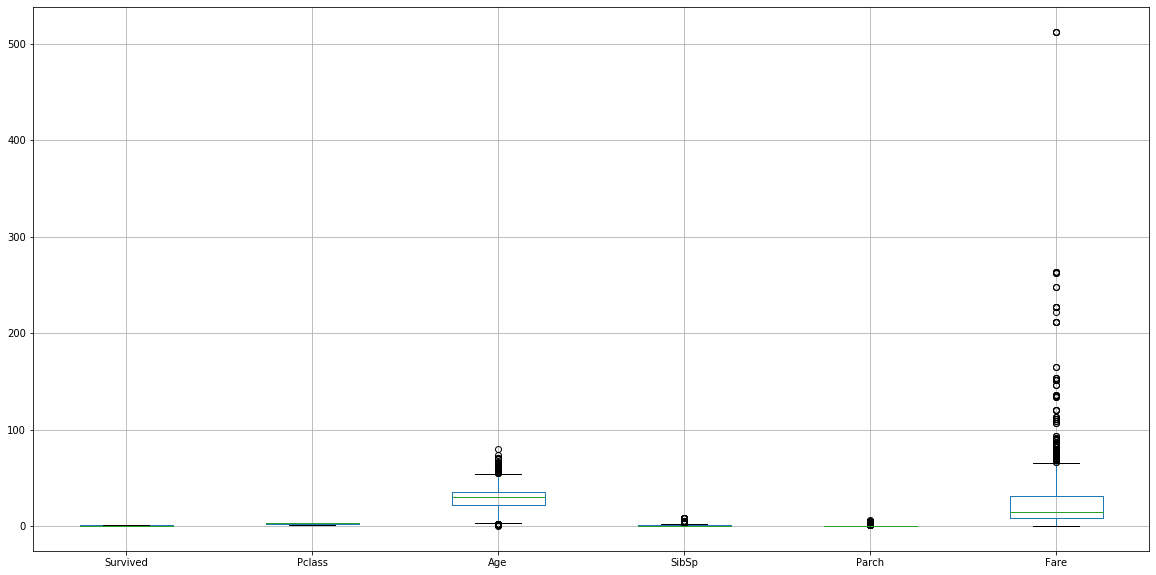

In [36]:
column=df_train.describe().columns
plt.figure(figsize=(20,10))
df_train.boxplot(column=['Survived','Pclass','Age','SibSp','Parch','Fare'])

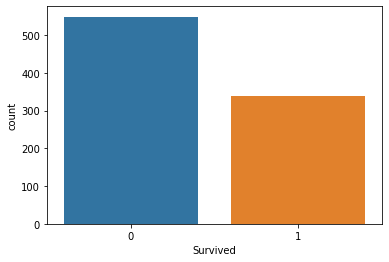

In [39]:
sns.countplot(df_train['Survived'])

#### Observation:

1. This bar plot above shows the number of passengers survived and not survived. The x_label represents Survival feature while the y_label represents the count of passenger. 

Percentage of females who survived: 74.03846153846155
Percentage of males who survived: 18.890814558058924


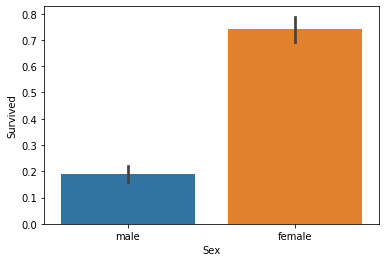

In [26]:
sns.barplot(x="Sex", y="Survived", data=df_train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df_train["Survived"][df_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df_train["Survived"][df_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

#### Observation:

1. This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. 
2. This bar plot shows that ~74% female passenger survived while only ~18% male passenger survived.

Percentage of 1st class who survived: 62.616822429906534
Percentage of 2nd class who survived: 47.28260869565217
Percentage of 3rd class who survived: 24.236252545824847


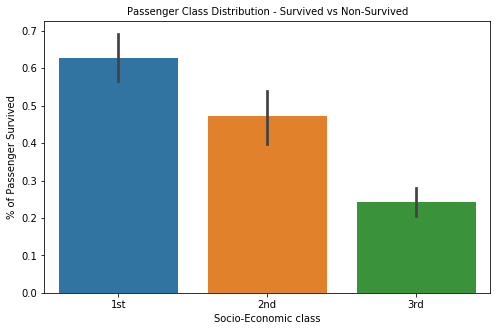

In [25]:
# Create subplot
plt.subplots(figsize = (8,5))
sns.barplot(x = "Pclass", y = "Survived", data=df_train, linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 10)
plt.xlabel("Socio-Economic class", fontsize = 10);
plt.ylabel("% of Passenger Survived", fontsize = 10);
labels = ['1st', '2nd', '3rd']
val = [0,1,2] 
plt.xticks(val, labels);


#print percentages of 1st vs. 2nd and 3rd class
print("Percentage of 1st class who survived:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of 2nd class who survived:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of 3rd class who survived:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

#### Observation:

1. 62% first class passenger survived titanic tragedy, while
2. 47% second class and
3. only 24% third class passenger survived.

The rich people would mostly be staying in the upper decks of the ship, which would have been easier for evacuation.

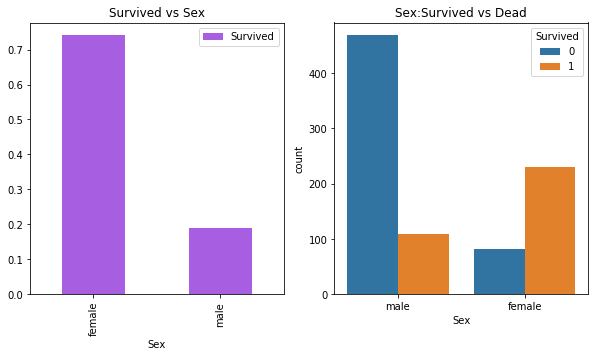

In [27]:
#create a subplot
f,ax=plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(color=['#a85ee0'],ax=ax[0])
ax[0].set_title('Survived vs Sex')

# create count plot
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Observation:
    1. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved.
    2. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

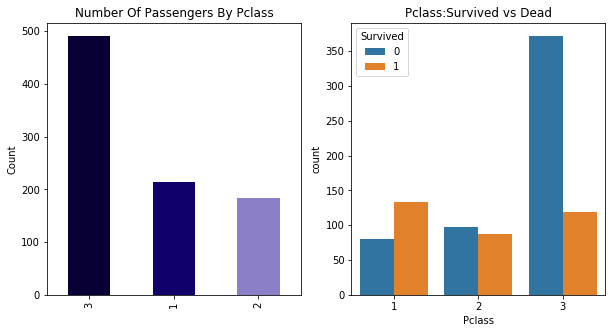

In [28]:
# create subplot plot
f,ax=plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
df_train['Pclass'].value_counts().plot.bar(color=['#080035','#0F006B','#8B80C7'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# create count plot
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

#### Observation:

1. The Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

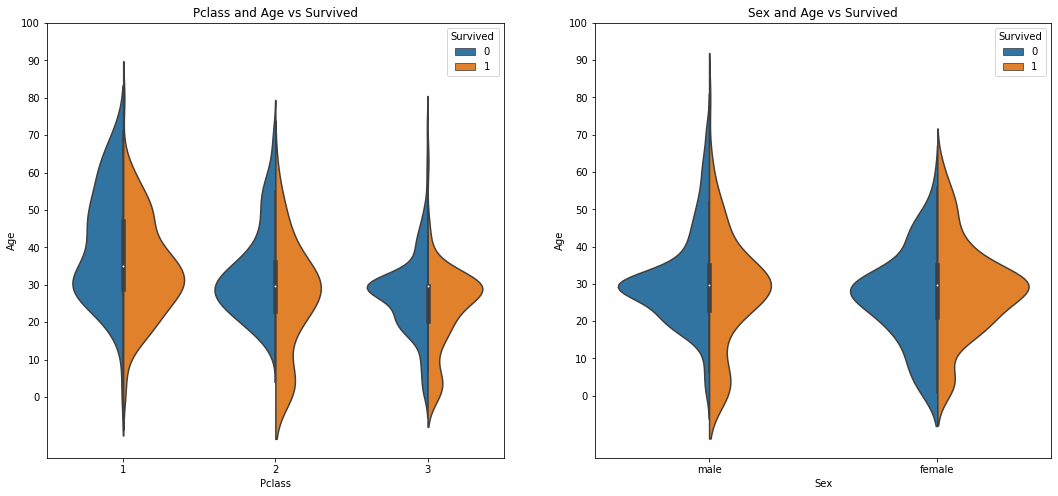

In [29]:
# create subplot plot

f,ax=plt.subplots(1,2,figsize=(18,8))

# create violinplot plot using groupby

sns.violinplot("Pclass","Age", hue="Survived", data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations:
    
     1.The No.of children increases with Pclass and the survival rate for passenegers below Age10(i.e children)decreases.
     2.Survival chances for Passenegers aged 20-50 from Pclass1 is high.
     3.For males, the survival chances decreases with an increase in age.

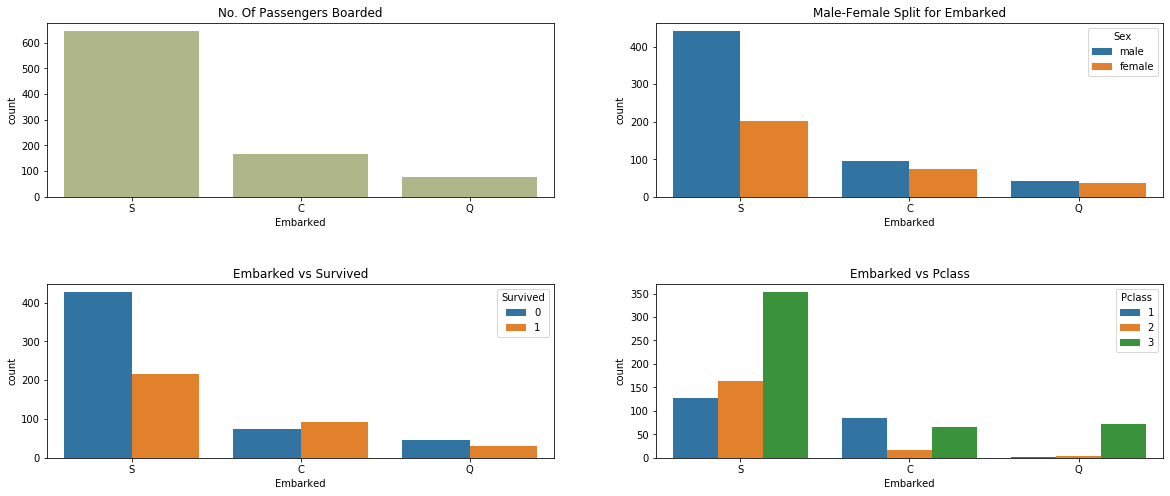

In [30]:
# create subplot plot
f,ax=plt.subplots(2,2,figsize=(20,8))

# create Bar (count) plot for Embarked vs. No. Of Passengers Boarded
sns.countplot('Embarked',data=df_train,ax=ax[0,0],color="#b4bf82")
ax[0,0].set_title('No. Of Passengers Boarded')

# create Bar (count) plot for Embarked vs. Male-Female Split
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# create Bar (count) plot for Embarked vs Survived
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# create Bar (count) plot for Embarked vs Pclass
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

#### Observations:

    1. Maximum passenegers boarded from S. Majority of them being from Pclass3.
    2. Port Q had almost 95% of the passengers were from Pclass3.

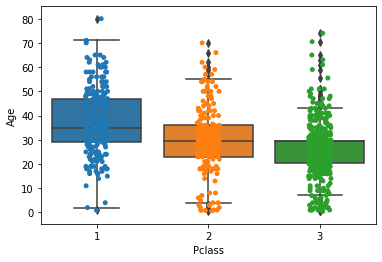

In [32]:
sns.boxplot(x="Pclass", y="Age", data=df_train)
sns.stripplot(x="Pclass", y="Age", data=df_train, jitter=True, edgecolor="gray")

#### Observations: 
    1. Average age goes down from class 1 to class 3.
    2. We can also see Outliers

Survived    0    1
Sex               
female     81  231
male      468  109


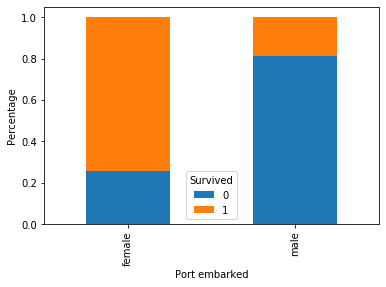

In [33]:
tab = pd.crosstab(df_train['Sex'], df_train['Survived'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

#### Observations:
    1. The chart shows Female die more compare to male
    2. But Male are high count in compare to Female.

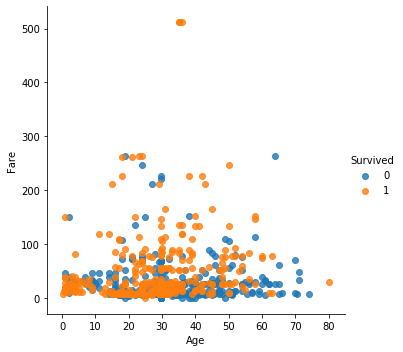

In [35]:
sns.lmplot(x='Age', y='Fare', hue='Survived', 
           data=df_train.loc[df_train['Survived'].isin([1,0])], 
           fit_reg=False)

#### Observation:
    1. Scatter plot showing some relation but not very useful in this case.

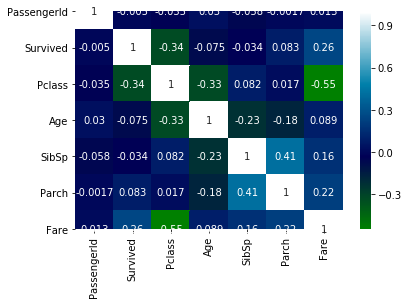

In [36]:
sns.heatmap(df_train.corr(),cmap="ocean",annot=True)

#### Observation:

1.Fare feature seems to have a significative correlation with the survival probability.

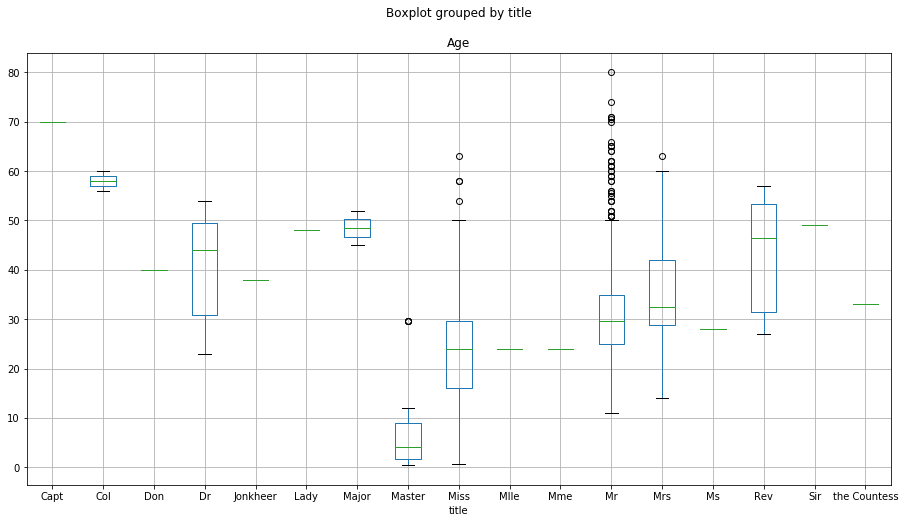

In [46]:
df_train.boxplot('Age','title',figsize=(15,8))

#### Observation:

1.We can see the distribution of ages based on the titles of the passengers. and there are some outliers.

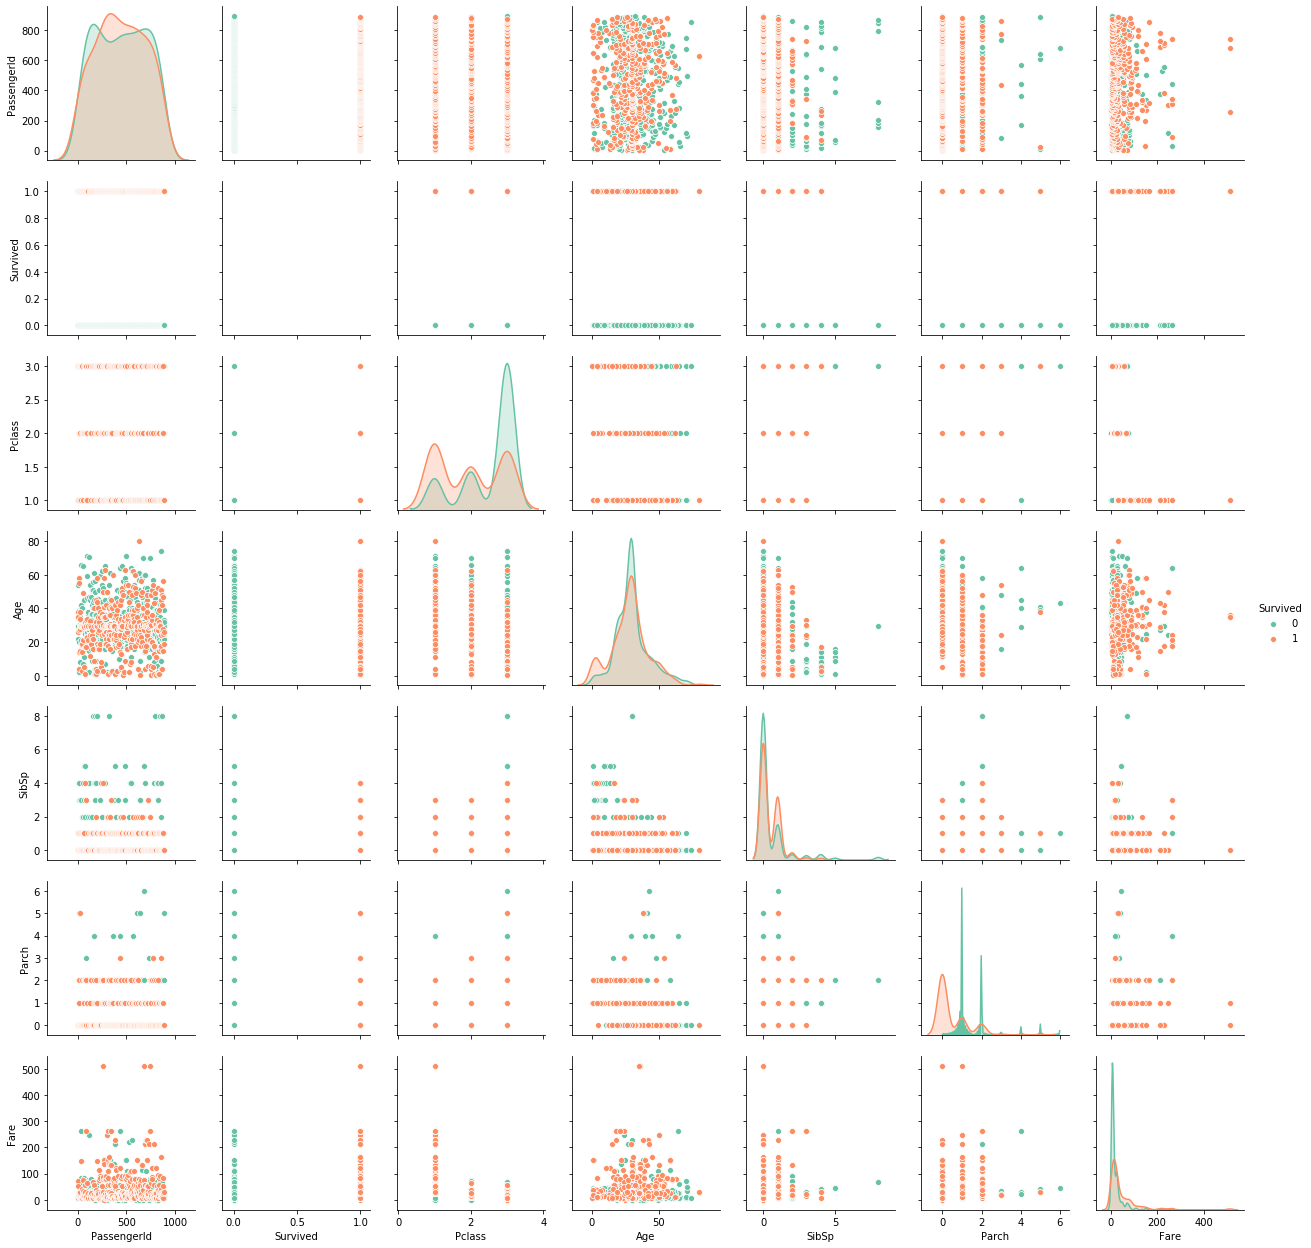

In [37]:
sns.pairplot(df_train, kind="scatter", hue="Survived", palette="Set2")

#### Observation:
    
   1. We can clear see there are some correlation in dataset.
   2. Age have correlation with fare.
   3. Other features have No significant correlation with each other.

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [50]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [51]:
# so we have titles for Nobels like Master, Capt...and others for regular people..
# so lets replace Nobels people by Dummy value 1 and regular people by Dummy value 0
title_mapping = {'Mr': 0, 'Mrs': 0, 'Miss': 0, 'Master' : 1,'Don': 1, 'Rev' : 1,'Dr' : 1,'Mme': 0, 'Ms': 0, 'Major': 1,
 'Lady': 1, 'Sir': 1, 'Mlle': 0, 'Col': 1, 'Capt': 1, 'Countess': 1, 'Jonkheer': 1,'Dona': 1,}

df_train['title'] = df_train['title'].map(title_mapping)
df_train['title'] = df_train['title'].fillna(0)
df_train['title']=df_train['title'].astype('int')
    
print(df_train['title'].unique())

[0 1]


In [52]:
df_train['title'].value_counts()

0    827
1     62
Name: title, dtype: int64

In [53]:
title_mapping = {'Mr': 0, 'Mrs': 0, 'Miss': 0, 'Master' : 1,'Don': 1, 'Rev' : 1,'Dr' : 1,'Mme': 0, 'Ms': 0, 'Major': 1,
 'Lady': 1, 'Sir': 1, 'Mlle': 0, 'Col': 1, 'Capt': 1, 'Countess': 1, 'Jonkheer': 1,'Dona': 1,}

df_test['title'] = df_test['title'].map(title_mapping)
df_test['title'] = df_test['title'].fillna(0)

    
print(df_test['title'].unique())

[0 1]


### Pclass Column and embarked column

In [54]:
df_train=pd.get_dummies(data=df_train,columns=['Sex','Embarked'],drop_first=True)
df_test=pd.get_dummies(data=df_test,columns=['Sex','Embarked'],drop_first=True)

### Droping unwanted Columns

In [55]:
df_train.drop(columns=['PassengerId','Name'],inplace=True)
df_test.drop(columns=['Name'],inplace=True)

In [56]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,title,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [57]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,title,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


# Model Building

In [61]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,log_loss,f1_score

x=df_train.drop(columns=['Survived'])
y=df_train['Survived']
x.head()

,Pclass,Age,SibSp,Parch,Fare,title,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(x)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0,class_weight='balanced')

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(class_weight='balanced')

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0,class_weight='balanced')

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=0)
bc=BaggingClassifier(base_estimator=knn,random_state=0)

import lightgbm as lgb
lgbm=lgb.LGBMClassifier(random_state=0)

from xgboost import XGBClassifier
classifier = XGBClassifier()

### Tuned RFC

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,1000),
        'max_features':sp_randint(1,9),
        'max_depth': sp_randint(2,50),
        'min_samples_split':sp_randint(2,80),
        'min_samples_leaf':sp_randint(1,80),
        'criterion':['gini','entropy']}

rsearch_rfc=RandomizedSearchCV(rfc_tunned,params,cv=3,scoring='accuracy',n_jobs=-1,random_state=0)

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130B9FE1908>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130B9FDF288>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BA01C588>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BA01CBC8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BA027088>},
                   random_state=0, scoring='accuracy')

In [67]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 26,
 'max_features': 1,
 'min_samples_leaf': 13,
 'min_samples_split': 60,
 'n_estimators': 706}

In [68]:
rfc_tunned=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=0)

### Tuned KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,20),'p':sp_randint(1,30)}

rsearch_knn=RandomizedSearchCV(knn_tunned,params,cv=3,scoring='accuracy',n_jobs=-1,random_state=0)
rsearch_knn.fit(X,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130B9FDFEC8>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB0CA588>},
                   random_state=0, scoring='accuracy')

In [70]:
rsearch_knn.best_params_

{'n_neighbors': 10, 'p': 20}

In [71]:
knn_tunned=KNeighborsClassifier(**rsearch_knn.best_params_)

### Tuned LGBM

In [72]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform 

lgbm_tunned=lgb.LGBMClassifier(random_state=0)
params={'n_estimators':sp_randint(1,1000),
       'max_depth': sp_randint(2,80),
        'learning_rate':sp_uniform(0.001,0.05),
        'num_leaves':sp_randint(2,50)
       }

rsearch_lgbm=RandomizedSearchCV(lgbm_tunned,param_distributions=params,cv=3,scoring='accuracy',n_iter=200,n_jobs=-1,random_state=0)

rsearch_lgbm.fit(X,y)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=0), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB08A688>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB08A6C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB08A848>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB08A588>},
                   random_state=0, scoring='accuracy')

In [73]:
rsearch_lgbm.best_params_

{'learning_rate': 0.017949255838988914,
 'max_depth': 38,
 'n_estimators': 769,
 'num_leaves': 13}

In [74]:
lgbm_tunned=lgb.LGBMClassifier(**rsearch_lgbm.best_params_,random_state=0)

### Tuned GB

In [75]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform 

gb_tuned=GradientBoostingClassifier(random_state=0)
params= {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
         'n_estimators':sp_randint(2,1500),
         'max_depth':sp_randint(1,10),
        'min_samples_split':sp_randint(2,100), 
         'min_samples_leaf':sp_randint(1,10),
        'max_features':sp_randint(1,9),
        'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

rsearch_gb=RandomizedSearchCV(gb_tuned,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_gb.fit(X,y)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': [0.15, 0.1, 0.05, 0.01,
                                                          0.005, 0.001],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB1B7BC8>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB1AE748>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB1AECC8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB1AE948>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130BB1B7A48>,
                                        'subsample': [0.7, 

In [76]:
rsearch_gb.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 80,
 'n_estimators': 1169,
 'subsample': 0.9}

In [77]:
gb_tuned=GradientBoostingClassifier(**rsearch_gb.best_params_,random_state=0)

In [80]:
models=[]
models.append(('Logistic',LR))
models.append(('Decision Tree',dt))
models.append(('Naive Bayes',nb))
models.append(('Random Forest',rfc))
models.append(('Random Forest Tunned',rfc_tunned))
models.append(('KNN',knn))
models.append(('KNN Tunned',knn_tunned))
models.append(('Bagging',bc))
models.append(('Gradient Boost',gb))
models.append(('Gradient Boost Tunned',gb_tuned))
models.append(('LGBM',lgbm))
models.append(('LGBM Tunned',lgbm_tunned))
models.append(('XGB',classifier))

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

results=[]
Var=[]
names=[]
for name,model in models:
    #kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=cross_val_score(model,X,y,cv=10,scoring='roc_auc')
    results.append(np.mean(cv_results))
    Var.append(np.var(cv_results))
    names.append(name)

r_df=pd.DataFrame({'Model':names,'ROC-AUC':results,'Variance Error':Var})
print(r_df)

                    Model   ROC-AUC  Variance Error
0                Logistic  0.863776        0.000962
1           Decision Tree  0.775549        0.004487
2             Naive Bayes  0.836110        0.001493
3           Random Forest  0.856392        0.003965
4    Random Forest Tunned  0.851020        0.002331
5                     KNN  0.849383        0.002635
6              KNN Tunned  0.849127        0.002443
7                 Bagging  0.853817        0.002716
8          Gradient Boost  0.873711        0.003567
9   Gradient Boost Tunned  0.867879        0.003655
10                   LGBM  0.858127        0.004657
11            LGBM Tunned  0.859996        0.004379
12                    XGB  0.853177        0.004967


In [85]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,title,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


# Predicting on Test Data

In [86]:
df_test2=df_test.drop('PassengerId',axis=1)

In [88]:
gb.fit(X,y)
y_test_pred = gb.predict(df_test2)

# Submission file

In [90]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_test_pred
    })

submission.to_csv('gender_submission.csv', index=False)